# Insights and Visualization of FordGoBike Data


## Investigation Overview

In this investigation, I wanted to look at the features on bike data that could be used to predict trip_duration. The main focus was on user_type, weekday and month.

## Dataset Overview

The dataset consisted of trip records of approximately 519700 bike trips. The other features in the dataset are duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type. We also extracted month and weekday from start_time column to ease the operations.   

In [1]:
# Let's start with importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
% matplotlib inline

In [2]:
# reading dataframe from csv file
ford=pd.read_csv('fordgo.csv')
# printing first few rows to confirm whether dataset is imported successfully
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
# converting start_time and end_time to datetime format
ford.start_time = pd.to_datetime(ford.start_time)
ford.end_time = pd.to_datetime(ford.end_time)

In [4]:
## we will store month and weekday_name from start_time in seperate column to ease our operations related to dat_time
ford['month']=ford.start_time.dt.strftime('%b').astype('category')
ford['weekday']=ford.start_time.dt.weekday_name.astype('category')

In [5]:
# converting start_station_id, end_station_id and bike_id into string datatype
ford= ford.astype({'start_station_id':'object','end_station_id':'object','bike_id':'object'})

In [6]:
# converting station_id, end_station_id and bike_id into string datatype
ford['user_type']=ford.user_type.astype('category')

In [7]:
# creating another variable to store the cleaned dataset
df=ford.copy()

## Distribution of Trip Duration
Trip durations in the dataset take on a very large range of perioad, from about 1 min to 1 day at the longest. Plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.

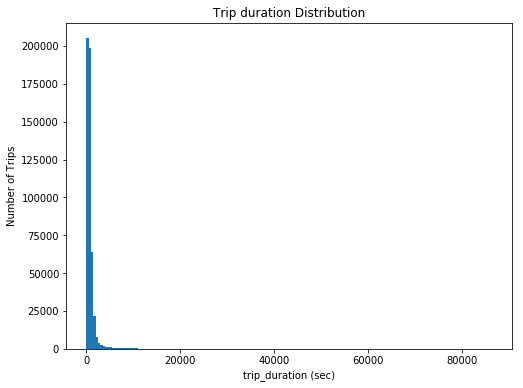

In [8]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.rcParams['figure.figsize'] = 8, 6
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Trip duration Distribution')
plt.xlabel('trip_duration (sec)')
plt.ylabel('Number of Trips')
plt.show()

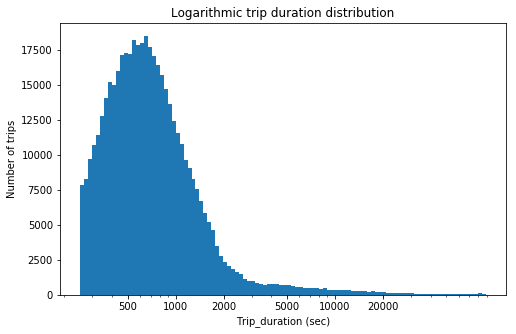

In [9]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1000', '2000', '5000', '10000', '20000'])
plt.title('Logarithmic trip duration distribution')
plt.xlabel('Trip_duration (sec)')
plt.ylabel('Number of trips')
plt.show()

## Distribution of Weekdays
There are significantly higher trips on workdays than weekend(saturday and sunday). This points to fact that large number of people are using bike for commute.

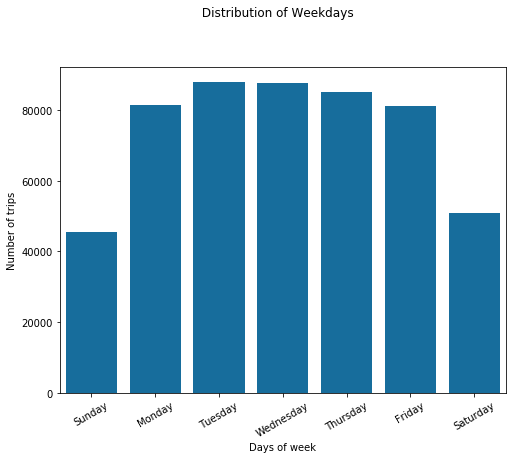

In [10]:
weekday_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
zero_color = sns.color_palette('colorblind')[0]
sns.countplot(data=df, x='weekday', order=weekday_order , color=zero_color);
plt.suptitle(" Distribution of Weekdays", y=1.02)
plt.xticks(rotation=30);
plt.xlabel('Days of week');
plt.ylabel('Number of trips');

## Distribution of User types
Subscribers are taking more rides than customers(casual) and guess what? this is almost 4 times more.

In [11]:
import warnings
warnings.filterwarnings('ignore')

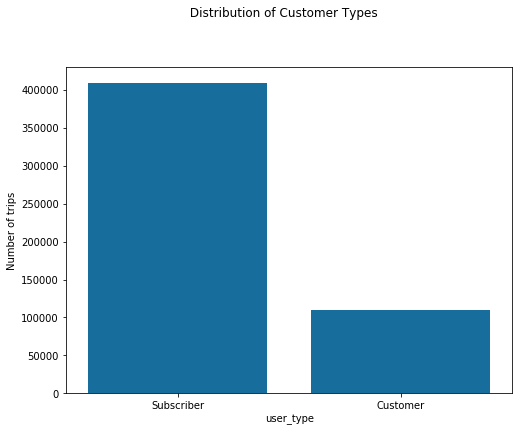

In [12]:
base_color = sns.color_palette()[0];
cat_order = df['user_type'].value_counts().index;
plt.suptitle(" Distribution of Customer Types", y=1.02)
sns.countplot(data = df, x = 'user_type', color = zero_color, order = cat_order);
plt.ylabel('Number of trips');

## Customers vs Trip Duration
This is really interesting. though we have seen subscribers are more, customers tend to drive for longer duration.

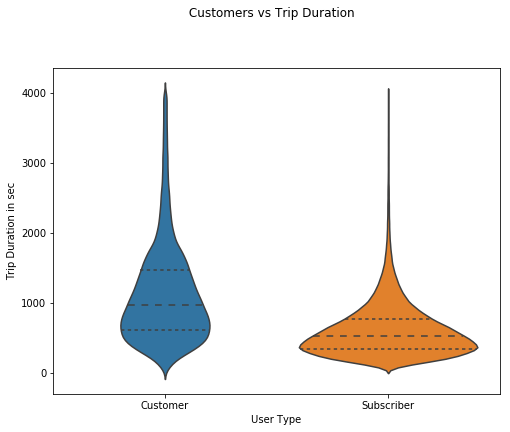

In [13]:
sns.violinplot(data = df[df.duration_sec < 4000], x = 'user_type', y = 'duration_sec', inner='quartile');
plt.suptitle(" Customers vs Trip Duration", y=1.02)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in sec');

##  Weekday vs Trip Duration
This is again an eye-catching fact that though on weekends less trips occur. people tend to drive longer on weekends.

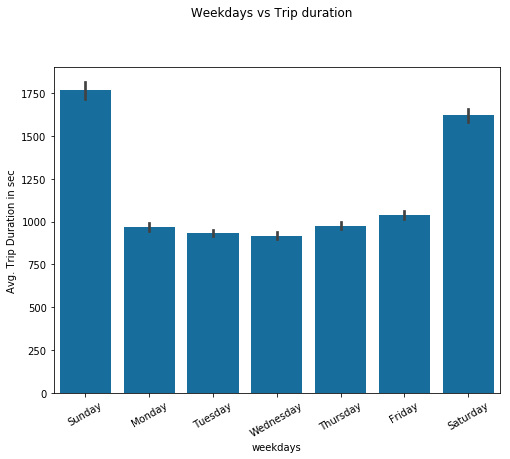

In [14]:
sns.barplot(data=df, x='weekday', y='duration_sec', color=zero_color, order=weekday_order);
plt.suptitle(" Weekdays vs Trip duration", y=1.02)
plt.xlabel('weekdays');
plt.xticks(rotation=30);
plt.ylabel('Avg. Trip Duration in sec');

## Weekdays vs Trip duration for user types 
Both subscriber and customer tend to drive for more duration on weekends(saturday and sunday) than on weekdays.

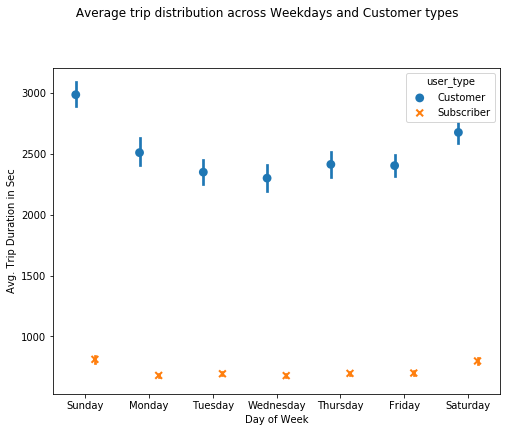

In [15]:
sns.pointplot(data=df, x= 'weekday', y= 'duration_sec', hue='user_type', dodge=0.3,  markers=["o", "x"], linestyles="", order=weekday_order);
plt.suptitle(" Average trip distribution across Weekdays and Customer types  ", y=1.02)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Sec');

In [ ]:
!jupyter nbconvert Project_fordGoBike_Part2.ipynb --to slides --post serve --template output_toggle